In [2]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from numpy import mean
import warnings


warnings.filterwarnings("ignore")

In [3]:
# locate the directory
DIRECTORY = "/home/akira/MoBI/cpcst_hopkins/"
arr = os.listdir(DIRECTORY)

In [4]:
def pre_process(subject,size):
    # The list of columns to be dropped
    drop_ls = [
    "expected_time",
    "flip_time",
    "stim_pos",
    "user_pos",
    "lambda_val",
    "change_rate_x",
    ]
    loo = LeaveOneOut()
    # the feature matrix in array form
    X = subject.drop(columns=drop_ls).to_numpy()
    #print("The shape of X:", X.shape)
    #y_pos_dif = (subject["user_pos"].to_numpy() - subject["stim_pos"].to_numpy())
    y_speed = subject["change_rate_x"].to_numpy()  # speed of change
    y = y_speed
    X_train, X_test, y_train, y_test = train_test_split(X[:size], y[:size], test_size=0.2, random_state=23)  # only 100 samples are used here
    #X_train = loo.split(X[:size])
    #X_test = ~
    #y_train = loo.split(y[:size])
    #y_test = ~
    return X_train, X_test, y_train, y_test

In [5]:
def model_ridge(X_train, X_test, y_train, y_test):
    loo = LeaveOneOut()
    rr = Ridge(random_state=23)
    return mean(cross_val_score(rr, X_train, y_train, scoring='neg_mean_absolute_error', cv=loo, n_jobs=-1))

In [6]:
scores=[]
sub_plot=[]
for i in range(0,61):
    subject = pd.read_csv(DIRECTORY + arr[i])
    rows,columns = subject.shape
    X_train, X_test, y_train, y_test = pre_process(subject, rows)
    val = model_ridge(X_train, X_test, y_train, y_test)
    sub_plot.append(i+1)
    scores.append(val)

In [15]:
scores

[np.float64(-0.000403192050533647),
 np.float64(-0.0020606771935916465),
 np.float64(-0.0002100627413880081),
 np.float64(-0.0006831367104210322),
 np.float64(-0.00028241557644451853),
 np.float64(-0.0003843168823895667),
 np.float64(-0.00031460509481347177),
 np.float64(-0.00045689415247654344),
 np.float64(-0.00012572302486345984),
 np.float64(-0.0001101207079320469),
 np.float64(-0.0006487897398730692),
 np.float64(-0.00031061239484100515),
 np.float64(-0.0003206658297536237),
 np.float64(-0.0005213432162888956),
 np.float64(-0.0004536265519991722),
 np.float64(-0.00021770349438930844),
 np.float64(-0.00014371635268780675),
 np.float64(-0.000339455651070003),
 np.float64(-0.00012765780641588623),
 np.float64(-0.000911619956996381),
 np.float64(-0.0006428894541499364),
 np.float64(-0.00015820365643838538),
 np.float64(-0.00026689203290321966),
 np.float64(-0.0002076526263493904),
 np.float64(-0.00017341360797261076),
 np.float64(-0.00034238173089206296),
 np.float64(-0.00047579395030

In [16]:
sub_plot

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

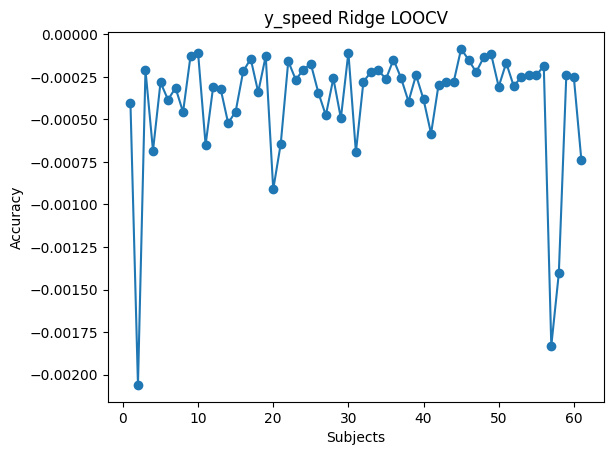

In [20]:
x = np.array(sub_plot)
y = np.array(scores)
plt.plot(x, y ,'-o')
plt.title('y_speed Ridge LOOCV')
plt.xlabel("Subjects")
plt.ylabel("Accuracy")

plt.show()

In [21]:
rows

17730